In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
scoreArray = []
numberArray = []

def read_all_files(line_number):
    folder_path = "Sequence//"


    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
    
        if os.path.isfile(file_path):
            try:
                with open(file_path, 'r') as file:
                    for i, line in enumerate(file):
                        if i + 1 == line_number:
                            number = int("".join(filter(str.isdigit, filename)))
                            numberArray.append(number)
                            score = float(line.split()[3])
                            scoreArray.append(score)
                            break
            except FileNotFoundError:
                return None


In [3]:
read_all_files(2)

In [4]:
numberArray = np.array(numberArray)
scoreArray = np.array(scoreArray)

In [5]:
data = pd.DataFrame()

In [6]:
data["Number"] = pd.to_numeric(numberArray)
data["Scores"] = scoreArray

In [7]:
data = data.sort_values(by="Number").reset_index(drop=True)

In [8]:
data.head()

,Number,Scores
0,1,-11.434
1,2,-11.479
2,10,-10.835
3,11,-10.324
4,12,-11.591


In [9]:
sequences = pd.read_excel('amino_acid_sequence_updated.xlsx')

column_name = 'Sequences'
my_list = sequences[column_name].tolist()

In [10]:
for value in sequences["Index"]:
    if value not in data["Number"].values:
        sequences = sequences.drop(sequences[sequences["Index"] == value].index)

In [11]:
sequences = sequences.drop('Index', axis=1)

In [12]:
sequences = sequences.reset_index(drop=True)

In [13]:
sequences

,Sequences
0,DAHGGCDWNYFRANEGTVAW
1,EWFGPYHAQFLHCELDNMDK
2,WEIMKPTPDGGNLAYWGYGA
3,NRGNRLNTGHSEWCYYSGSF
4,EDDFKFFPRDRMLDGEEWPC
...,...
715,RSRSLKAHSMWDFYVKSAMR
716,SNSHWNNGDPMLGVSRLIWP
717,YDTSQPIQRIVLFDCNESSG
718,AMQMRIQGLYSGPDDQCCVY


In [14]:
data["Sequences"] = sequences

In [15]:
data

,Number,Scores,Sequences
0,1,-11.434,DAHGGCDWNYFRANEGTVAW
1,2,-11.479,EWFGPYHAQFLHCELDNMDK
2,10,-10.835,WEIMKPTPDGGNLAYWGYGA
3,11,-10.324,NRGNRLNTGHSEWCYYSGSF
4,12,-11.591,EDDFKFFPRDRMLDGEEWPC
...,...,...,...
715,826,-11.727,RSRSLKAHSMWDFYVKSAMR
716,827,-11.579,SNSHWNNGDPMLGVSRLIWP
717,829,-10.463,YDTSQPIQRIVLFDCNESSG
718,830,-10.739,AMQMRIQGLYSGPDDQCCVY


In [16]:
data.to_excel('final_data.xlsx', index=False)

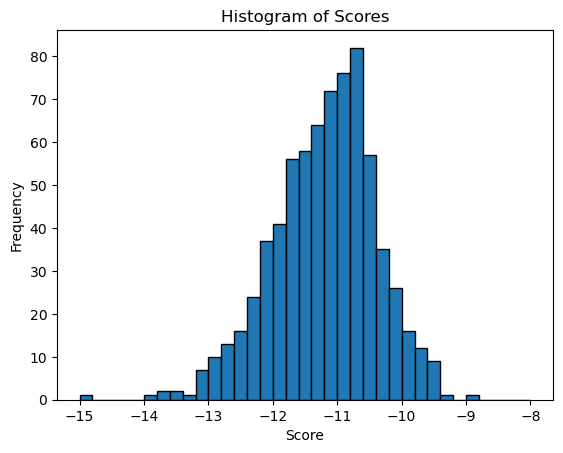

In [17]:
min_val = data['Scores'].min()
max_val = data['Scores'].max()
bins = np.arange(np.floor(min_val), np.ceil(max_val) + 0.2, 0.2)
plt.hist(data['Scores'], bins=bins, edgecolor='black')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")
plt.show()